# Medical Data Visualizer

Exploring the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices. 

### Import of libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Creating a data frame from data.csv

In [2]:
df = pd.read_csv("data.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.index = df['id']

In [4]:
df = df.drop(['id'], axis = 1)

In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The rows in the dataset represent patiets and the columns represent information like body measurements, results from various blood tests, and lifestyle choices.

### Adding overweight column

Calculating patient BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Setting the value 0 for NOT overweight and the value 1 for overweight.

In [6]:
overweight = df['weight']/(df['height']/100 * df['height']/100)

In [7]:
df['overweight'] = overweight

In [8]:
mask = df['overweight'] <= 25
df.loc[mask, 'overweight'] = 0

In [9]:
mask = df['overweight'] > 25
df.loc[mask, 'overweight'] = 1

In [10]:
df['overweight'] = df['overweight'].astype(int)

In [11]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


### Normalizing data

Normalizing data by making 0 always good and 1 always bad. If the value of cholesterol or glucose is 1, setting it to 0. If the value is more than 1, setting it to the value 1.

In [12]:
mask = df['gluc'] == 1
df.loc[mask, 'gluc'] = 0

In [13]:
mask = df['gluc'] >0
df.loc[mask, 'gluc'] = 1

In [14]:
mask = df['cholesterol'] == 1
df.loc[mask, 'cholesterol'] = 0

In [15]:
mask = df['cholesterol'] > 0
df.loc[mask, 'cholesterol'] = 1

### Categorical plot

Converting the data into a long format and creating a chart that shows the value counts of the categorical features. The dataset is split by 'Cardio' so there is one chart for each 'cardio' value.

In [16]:
df_cat = pd.melt(df, id_vars = ['cardio'], value_vars= ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [17]:
df_cat = pd.DataFrame(df_cat.groupby(['cardio', 'variable', 'value'])['value'].count()).rename(columns={'value' :  'total'})

In [18]:
df_cat = df_cat.reset_index()

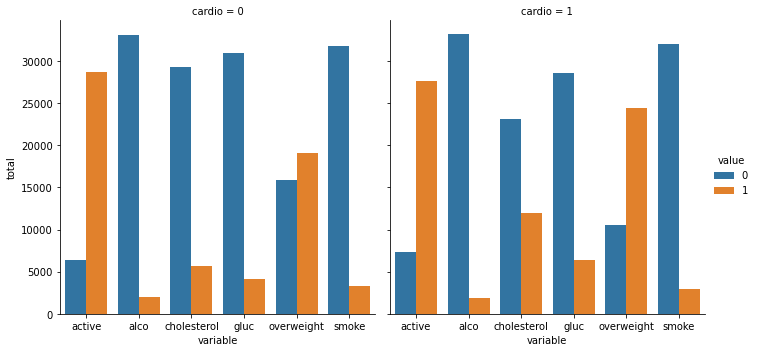

In [19]:
sns.catplot(x='variable', y='total', hue='value', col='cardio', kind='bar',
                 data=df_cat)

According to the chart, there is a higher representation of patients who are overweight within the group with cardiac disease. There are also more patients with bad results of glucose and cholesterol

### Cleaning the data

Filtering out the following patient segments that represent data in wich:
* diastolic pressure is higher than systolic 
* height is less than the 2.5th percentile 
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile

In [20]:
df = df.reset_index()

In [21]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [22]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))]

In [28]:
df_heat = df_heat.reset_index().drop(['index'], axis=1)

In [30]:
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63254,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
63255,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
63256,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
63257,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


### Heatmap

Creating and plotting a correlation matrix using the dataset. 

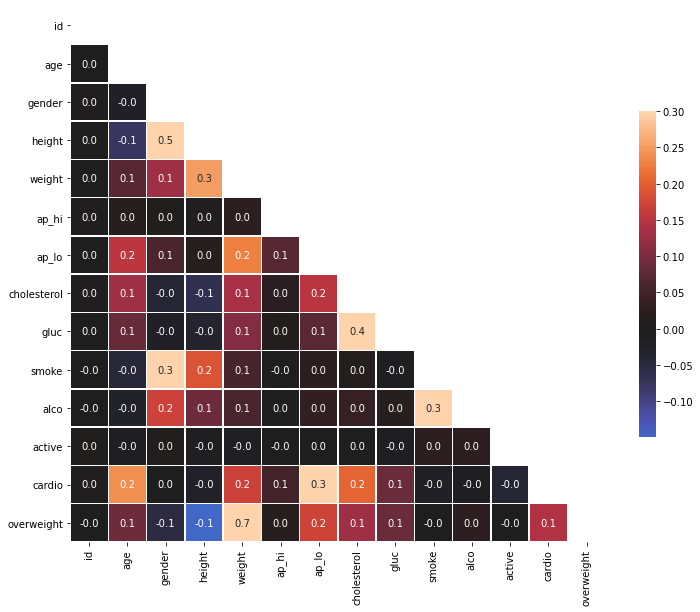

In [31]:
# Calculate the correlation matrix
corr = df_heat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap
ax = sns.heatmap(corr, mask=mask, vmax=0.3, center=0, annot=True, fmt=".1f", square=True,
                 linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


According to the heatmap biggest correlation between cardiac disease is diastolic blood pressure. Age, cholesterol, and weight are also major factors in heart disease.